# Install Fastai 

In [1]:
 !curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   2670      0 --:--:-- --:--:-- --:--:--  2660
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.28)
Already up to date.


## Verify installation

In [2]:
from fastai import *
from fastai.vision import *

__version__

'1.0.28'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Creating Custom Dataset

Here we create our own dataset using results from google images. 
We'll make a leopard versus cheetah classifier. 

Use [this](https://github.com/hardikvasa/google-images-download) code to download.
Begin by mounting the google drive

In [4]:
# Mount Gdrive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Change working directory 

import os
os.chdir("drive/My Drive/fastai/cheetah_leopard")

In [6]:
!pip install google_images_download

In [7]:
!googleimagesdownload -k "cheetah" -l 100 -o "data" 


Item no.: 1 --> Item name = cheetah
Evaluating...
Starting Download...
Completed Image ====> 1. cheetah_%28acinonyx_jubatus%29_female_2.jpg
Completed Image ====> 2. cheetah-004.jpg
Completed Image ====> 3. cheetah-mom-cubs.ngsversion.1461770750320.adapt.1900.1.jpg
Completed Image ====> 4. cheetah_kruger.jpg
Completed Image ====> 5. cheetah-running.ngsversion.1396530527499.jpg
Completed Image ====> 6. header-cheetah-sperka.jpg
Completed Image ====> 7. rr-cheetah-sept-2015.jpg
Completed Image ====> 8. 152301-120-9abf227d.jpg
Completed Image ====> 9. cheetah_portrait_whipsnade_zoo.jpg
Completed Image ====> 10. cheetah-002.jpg
Completed Image ====> 11. cheetah_16x9.jpg
Completed Image ====> 12. cheetah-cheetah318.jpg
Completed Image ====> 13. maxresdefault.jpg
Completed Image ====> 14. 37033466026_e81061dcb0_b.jpg
Completed Image ====> 15. image-20160507-32047-1eullie.jpg
Completed Image ====> 16. 1cheetah-gc590a.jpg
Completed Image ====> 17. cheetah-003.jpg
Completed Image ====> 18. erin

In [8]:
!googleimagesdownload -k "leopard" -l 100 -o "data" 


Item no.: 1 --> Item name = leopard
Evaluating...
Starting Download...
Completed Image ====> 1. 1200px-african_leopard%2c_panthera_pardus_pardus%2c_near_lake_panic%2c_kruger_national_park%2c_south_africa_%2819448654130%29.jpg
Completed Image ====> 2. %c2%a9benjamin_ackerman_scotia_female_exeter.jpg
Completed Image ====> 3. 220px-panthera_pardus_close_up-2.jpg
IOError on an image...trying next one... Error: The read operation timed out
Completed Image ====> 4. 1-kruger-park-leopard-in-tree-c-duplessis-590.jpg
Completed Image ====> 5. 400x225_464165.jpg
Completed Image ====> 6. sn-leopard.jpg
Completed Image ====> 7. leopard-bw_1200px.jpg
Completed Image ====> 8. leopard.jpeg
Completed Image ====> 9. leopard-and-cub-showing-affection-care-of-the-wildlife.jpg
Completed Image ====> 10. de6f6e35f2c6a611ddac365316e03bc1_large.jpeg
Completed Image ====> 11. jp
Completed Image ====> 12. p03lt4s9.jpg
Completed Image ====> 13. sd-me-amur-leopard-cubs-zoo-20180601.jpg
Completed Image ====> 14. h

In [9]:
path = Path('data')
path.ls()

[PosixPath('data/leopard'),
 PosixPath('data/cheetah'),
 PosixPath('data/models')]

Fastai has an interactive tool to help in cleaning data. As ipywidgets are not yet supported by colab, clean data manually in GDrive first.

In [0]:
classes = ['cheetah', 'leopard']

In [11]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

cheetah


leopard


cannot identify image file <_io.BufferedReader name='data/leopard/40. ?media_id=600453360058642.jpg'>
cannot identify image file <_io.BufferedReader name='data/leopard/89. ?media_id=1752544258328760.jpg'>


In [0]:
np.random.seed(4)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=229, num_workers=4).normalize(imagenet_stats)

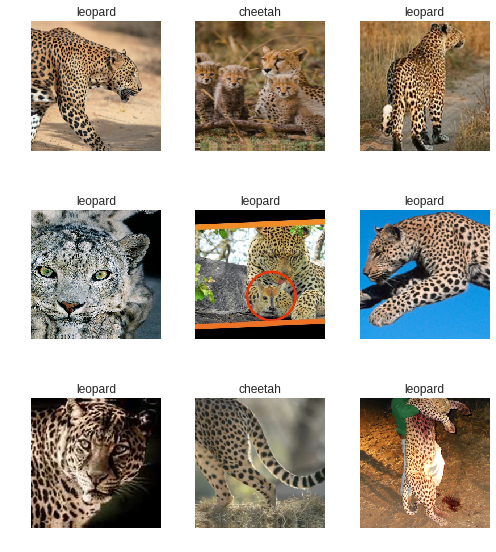

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
print(data.classes)
len(data.classes),data.c

['leopard', 'cheetah']


(2, 2)

## Training: resnet50

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).


We will train for 5 epochs (5 cycles through all our data).

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [16]:
learn.fit_one_cycle(5)

Total time: 02:43
epoch  train_loss  valid_loss  error_rate
1      0.926619    0.089882    0.024691    (00:48)
2      0.505949    0.071905    0.012346    (00:29)
3      0.355676    0.076700    0.012346    (00:29)
4      0.273840    0.070908    0.012346    (00:28)
5      0.277150    0.069862    0.012346    (00:28)



In [0]:
learn.save('model')

## Interpretation

In [19]:
learn.load('model')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (324 items)
[Category leopard, Category leopard, Category leopard, Category leopard, Category leopard]...
Path: data
x: ImageItemList (324 items)
[Image (3, 390, 590), Image (3, 225, 400), Image (3, 720, 1280), Image (3, 646, 1200), Image (3, 2550, 3400)]...
Path: data;
Valid: LabelList
y: CategoryList (81 items)
[Category leopard, Category leopard, Category leopard, Category leopard, Category cheetah]...
Path: data
x: ImageItemList (81 items)
[Image (3, 990, 660), Image (3, 1200, 1600), Image (3, 709, 1000), Image (3, 1003, 1250), Image (3, 500, 877)]...
Path: data;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): B

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

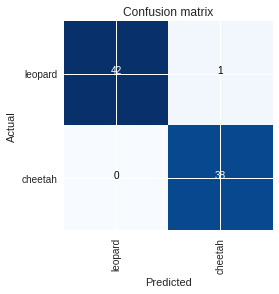

In [21]:
interp.plot_confusion_matrix()

## Using Inferences

In [0]:
defaults.device = torch.device('cpu')

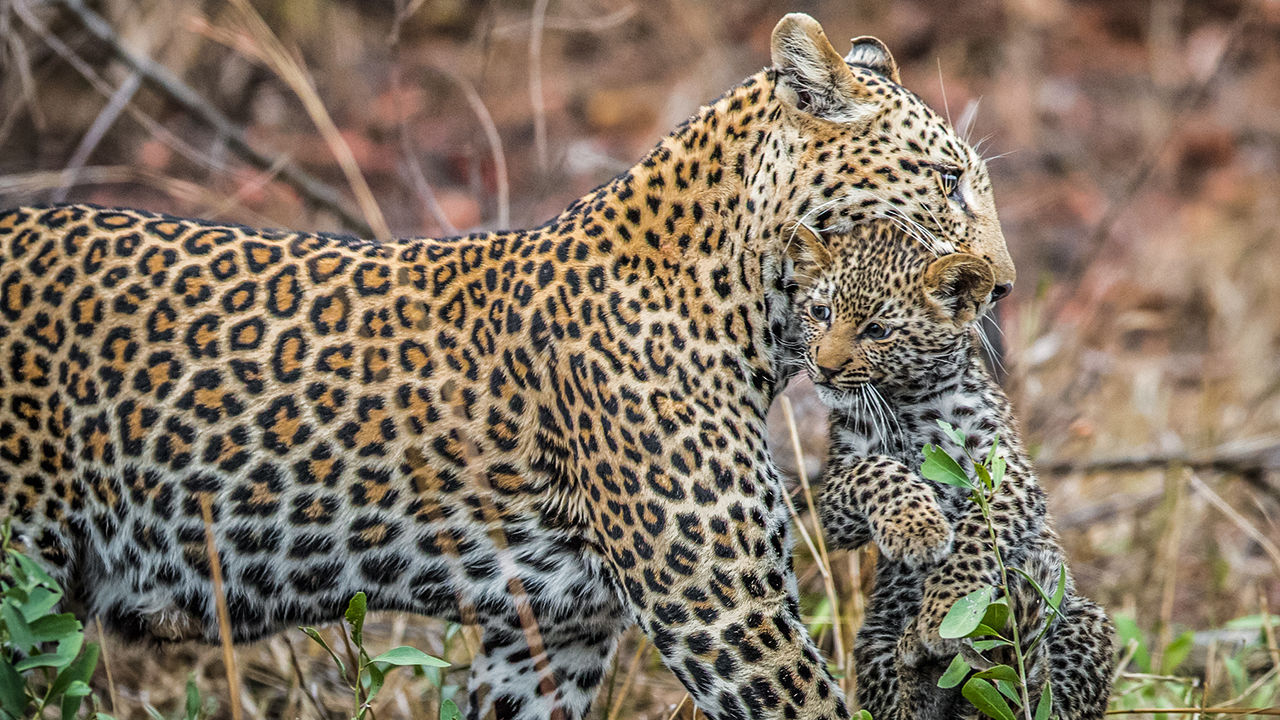

In [33]:
img = open_image(path/'leopard'/'6. sn-leopard.jpg')
img

In [35]:
classes = ['leopard', 'cheetah']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=229).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet50)
learn.load('model')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (1 items)
[]...
Path: data
x: ImageItemList (1 items)
[]...
Path: data;
Valid: LabelList
y: CategoryList (1 items)
[]...
Path: data
x: ImageItemList (1 items)
[]...
Path: data;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'leopard'